<h1>Assignment 7</h1>

Unmessenger

Name - Manish Swarnkar

Project - House price Prediction

In [240]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import missingno as msno

In [241]:
data = pd.read_csv("/content/data (2).csv")
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [242]:
data.shape

(4600, 18)

In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [244]:
data["date"] = pd.to_datetime(data['date'])

In [245]:
data["price"] = data["price"].astype("int64")
data["bedrooms"] = data["bedrooms"].astype("int64")
data["bathrooms"] = data["bathrooms"].astype("int64")
data["floors"] = data["floors"].astype("int64")
data["street"] = data["price"].astype("string")
data["city"] = data["price"].astype("string")
data["statezip"] = data["price"].astype("string")
data["country"] = data["price"].astype("string")

In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   int64         
 2   bedrooms       4600 non-null   int64         
 3   bathrooms      4600 non-null   int64         
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   int64         
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   string        
 15  city           4600 n

In [247]:
data.insert(1, 'year', data.date.dt.year)

<h1>Data Preprocessing</h1>

In [248]:
data.head()

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,2014,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,313000,313000,313000,313000
1,2014-05-02,2014,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,2384000,2384000,2384000,2384000
2,2014-05-02,2014,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,342000,342000,342000,342000
3,2014-05-02,2014,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,420000,420000,420000,420000
4,2014-05-02,2014,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,550000,550000,550000,550000


In [249]:
data["price"].value_counts()

0          49
300000     42
400000     31
440000     29
450000     29
           ..
684680      1
609900      1
1635000     1
1339000     1
220600      1
Name: price, Length: 1741, dtype: int64

<h3>Raws with zero value should be remove</h3>

In [250]:
data["price"].replace(0, np.nan, inplace = True)
data.dropna(inplace = True)

In [251]:
data.corr()

<ipython-input-251-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,1.000000,0.210228,0.331917,0.445494,0.051347,0.138342,0.150083,0.242587,0.038892,0.380661,0.217782,0.021757,-0.029034
bedrooms,NaN,0.210228,1.000000,0.499640,0.596053,0.071138,0.154922,-0.005521,0.115080,0.023018,0.485672,0.335103,0.141498,-0.062219
bathrooms,NaN,0.331917,0.499640,1.000000,0.706352,0.111565,0.466471,0.056590,0.196671,-0.118957,0.645209,0.268266,0.394298,-0.188182
sqft_living,NaN,0.445494,0.596053,0.706352,1.000000,0.213268,0.339348,0.107758,0.309343,-0.062529,0.875657,0.449671,0.284733,-0.121589
sqft_lot,NaN,0.051347,0.071138,0.111565,0.213268,1.000000,-0.005019,0.017408,0.072527,0.000929,0.219193,0.035894,0.049163,-0.021068
floors,NaN,0.138342,0.154922,0.466471,0.339348,-0.005019,1.000000,0.010928,0.022631,-0.305362,0.516264,-0.252654,0.561159,-0.248916
waterfront,NaN,0.150083,-0.005521,0.056590,0.107758,0.017408,0.010928,1.000000,0.347572,0.006112,0.072502,0.088880,-0.032017,0.015821
view,NaN,0.242587,0.115080,0.196671,0.309343,0.072527,0.022631,0.347572,1.000000,0.062560,0.174629,0.317117,-0.066344,0.025846
condition,NaN,0.038892,0.023018,-0.118957,-0.062529,0.000929,-0.305362,0.006112,0.062560,1.000000,-0.176549,0.197144,-0.398886,-0.184483


In [252]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4551.0,2014.000000,0.000000,2014.0,2014.0,2014.0,2014.0,2014.0
price,4551.0,557905.885959,563929.874935,7800.0,326264.0,465000.0,657500.0,26590000.0
bedrooms,4551.0,3.394639,0.904595,0.0,3.0,3.0,4.0,9.0
bathrooms,4551.0,1.782905,0.744431,0.0,1.0,2.0,2.0,8.0
sqft_living,4551.0,2132.372226,955.949708,370.0,1460.0,1970.0,2610.0,13540.0
sqft_lot,4551.0,14835.280598,35964.077825,638.0,5000.0,7680.0,10978.0,1074218.0
floors,4551.0,1.459240,0.552355,1.0,1.0,1.0,2.0,3.0
waterfront,4551.0,0.006592,0.080932,0.0,0.0,0.0,0.0,1.0
view,4551.0,0.234674,0.765373,0.0,0.0,0.0,0.0,4.0
condition,4551.0,3.449352,0.675160,1.0,3.0,3.0,4.0,5.0


<Axes: >

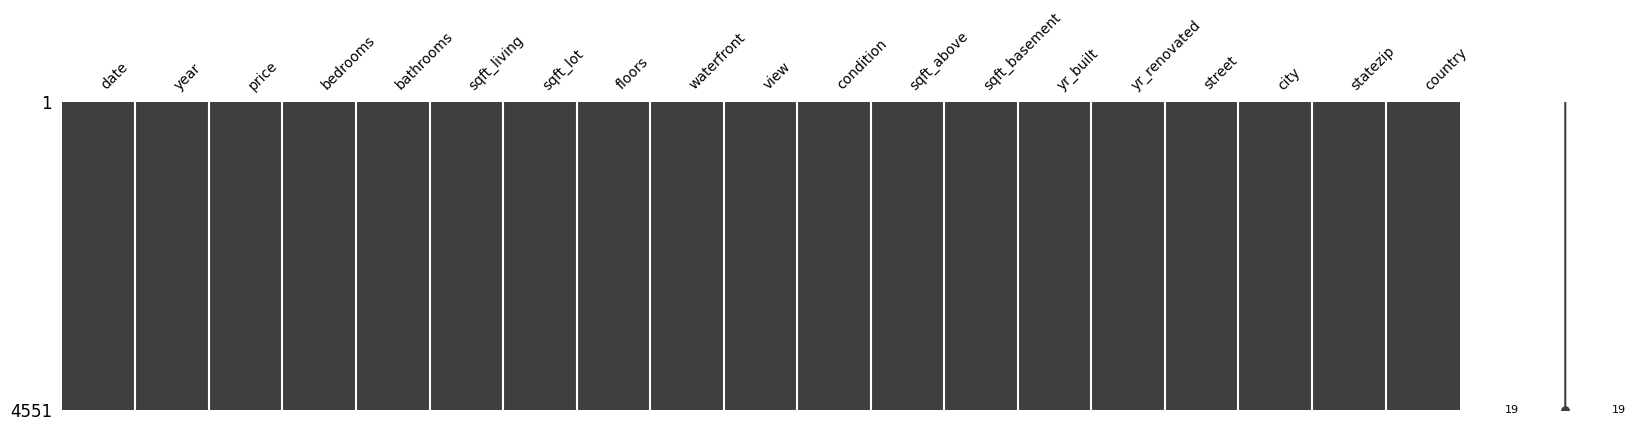

In [253]:
#handling Missing Values

msno.matrix(data,figsize=(20,4),fontsize=10)

In [254]:
# age of house - Adding new Column

data["age"] = data["year"] - data["yr_built"]

In [255]:
data.head()

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,age
0,2014-05-02,2014,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,313000,313000,313000,313000,59
1,2014-05-02,2014,2384000.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,2384000,2384000,2384000,2384000,93
2,2014-05-02,2014,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,342000,342000,342000,342000,48
3,2014-05-02,2014,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,420000,420000,420000,420000,51
4,2014-05-02,2014,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,550000,550000,550000,550000,38


<Axes: >

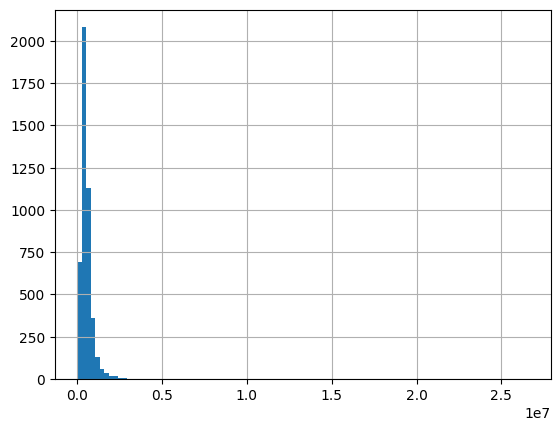

In [256]:
data["price"].hist(bins = 100)

<h3>Removing Ourliers</h3>

In [258]:
NUMERICAL_COLS = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement','yr_built', 'yr_renovated']

In [259]:
OUTLIERS_DETECT = ['price']

def DetectOutlier_ZScore(data, col_name, numerical_cols):
    col_values = data.loc[:, col_name] # series object
    upper_limit = col_values.mean() + 3*col_values.std()
    lower_limit = col_values.mean() - 3*col_values.std()

    print(" Upper Limit :", upper_limit, " Lower Limit :", lower_limit)

    outliers = np.logical_or(col_values.values > upper_limit, col_values.values < lower_limit) # vector of booleans
    idxs = np.where(outliers)[0]

    print(" Outliers Detected : ", len(idxs))

    plt.plot([upper_limit]*data.shape[0])
    plt.plot([lower_limit]*data.shape[0])
    plt.scatter(x = [i for i in range(data.shape[0])] , y = col_values)
    plt.xlabel("Data Points ")
    plt.ylabel(col_name)
    plt.title(f" Outliers in {col_name} ")
    plt.show()

    print(" Fixing Outliers ")
    data.loc[idxs, col_name] = np.nan # converting outliers to nulls
    imputer = KNNImputer()
    data.loc[:, numerical_cols] = imputer.fit_transform(data.loc[:, numerical_cols])

    plt.plot([upper_limit]*data.shape[0])
    plt.plot([lower_limit]*data.shape[0])
    plt.scatter(x = [i for i in range(data.shape[0])] , y = data.loc[:, col_name].values)
    plt.xlabel("Data Points ")
    plt.ylabel(col_name)
    plt.title(f" Outliers in {col_name} ")
    plt.show()

    return data

 Upper Limit : 2249695.510765289  Lower Limit : -1133883.7388470294
 Outliers Detected :  34


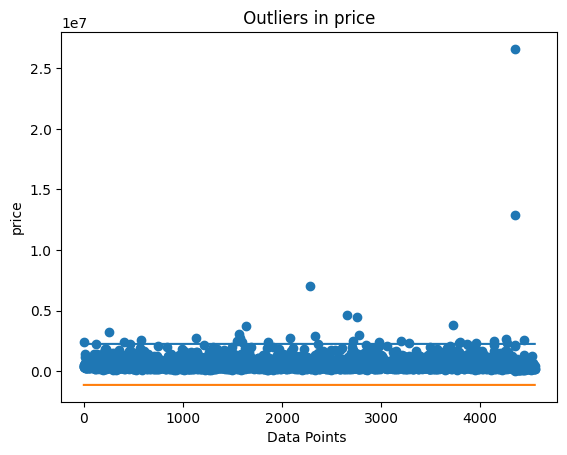

 Fixing Outliers 


<ipython-input-259-abfa41a85218>:26: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, numerical_cols] = imputer.fit_transform(data.loc[:, numerical_cols])


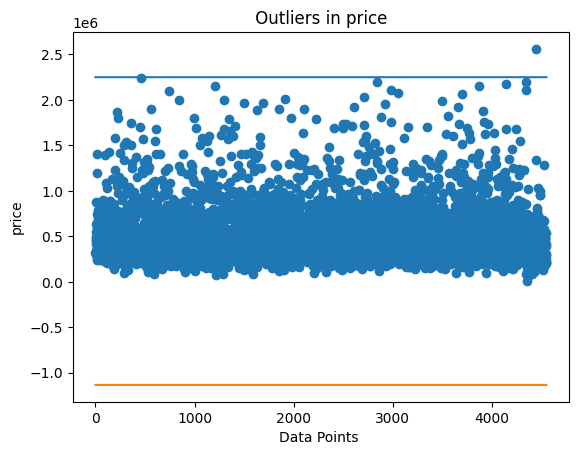

In [260]:
for outlier_col in OUTLIERS_DETECT:
    data = DetectOutlier_ZScore(data, outlier_col, NUMERICAL_COLS)

<Axes: >

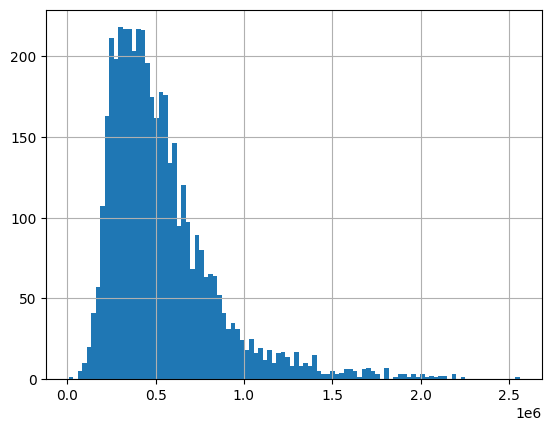

In [261]:
data["price"].hist(bins = 100)

After removing of outliers now we can see normal distribution in the prices

<ipython-input-262-331dd13f2f56>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<Axes: xlabel='price', ylabel='Density'>

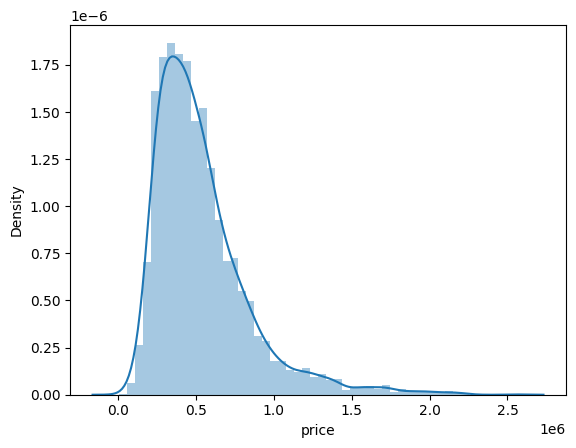

In [262]:
sns.distplot(data['price'])

<ipython-input-263-af12a17eeb6b>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


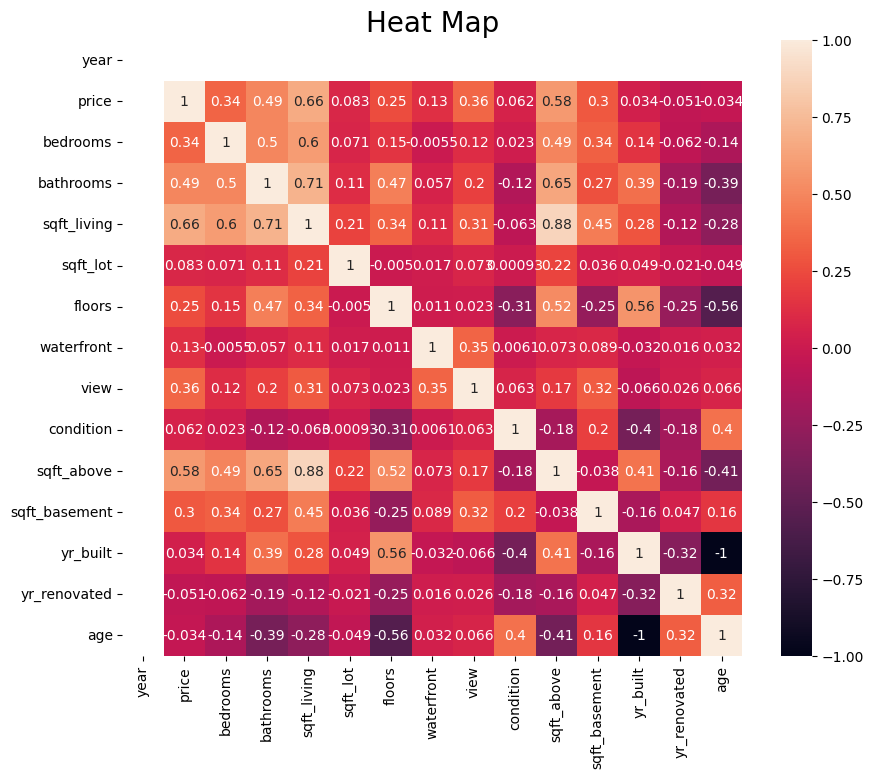

In [263]:
#heat Map

plt.figure(figsize=(10, 8))


sns.heatmap(data.corr(), annot=True)

plt.title('Heat Map', size=20)
plt.yticks(rotation=0)

plt.show()

In [264]:
#removing unwanted columns
data.columns

Index(['date', 'year', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'age'],
      dtype='object')

In [265]:
from sklearn.decomposition import PCA
X = pd.get_dummies(data.city, prefix = "city")
pca = PCA(n_components = 2)
X_PCA = pca.fit_transform(X)
data["city_pca1"] = X_PCA[:, 0]
data["city_pca2"] = X_PCA[:, 1]

In [266]:
data.head()

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,age,city_pca1,city_pca2
0,2014-05-02,2014,313000.0,3.0,1.0,1340.0,7912.0,1.0,0.0,0.0,...,0.0,1955.0,2005.0,313000,313000,313000,313000,59,-0.007152,-0.004472
1,2014-05-02,2014,877000.0,5.0,2.0,3650.0,9050.0,2.0,0.0,4.0,...,280.0,1921.0,0.0,2384000,2384000,2384000,2384000,93,-0.006796,-0.004168
2,2014-05-02,2014,342000.0,3.0,2.0,1930.0,11947.0,1.0,0.0,0.0,...,0.0,1966.0,0.0,342000,342000,342000,342000,48,-0.007761,-0.005011
3,2014-05-02,2014,420000.0,3.0,2.0,2000.0,8030.0,1.0,0.0,0.0,...,1000.0,1963.0,0.0,420000,420000,420000,420000,51,-0.009546,-0.004469
4,2014-05-02,2014,550000.0,4.0,2.0,1940.0,10500.0,1.0,0.0,0.0,...,800.0,1976.0,1992.0,550000,550000,550000,550000,38,-0.021516,0.064631


In [267]:
data.drop(['date'], axis = 1, inplace = True)
data.drop(['year'], axis = 1, inplace = True)
data.drop(['country'], axis = 1, inplace = True)
data.drop(['statezip'], axis = 1, inplace = True)
data.drop(['city'], axis = 1, inplace = True)

In [268]:
data.drop(['street'], axis = 1, inplace = True)

In [269]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,age,city_pca1,city_pca2
0,313000.0,3.0,1.0,1340.0,7912.0,1.0,0.0,0.0,3.0,1340.0,0.0,1955.0,2005.0,59,-0.007152,-0.004472
1,877000.0,5.0,2.0,3650.0,9050.0,2.0,0.0,4.0,5.0,3370.0,280.0,1921.0,0.0,93,-0.006796,-0.004168
2,342000.0,3.0,2.0,1930.0,11947.0,1.0,0.0,0.0,4.0,1930.0,0.0,1966.0,0.0,48,-0.007761,-0.005011
3,420000.0,3.0,2.0,2000.0,8030.0,1.0,0.0,0.0,4.0,1000.0,1000.0,1963.0,0.0,51,-0.009546,-0.004469
4,550000.0,4.0,2.0,1940.0,10500.0,1.0,0.0,0.0,4.0,1140.0,800.0,1976.0,1992.0,38,-0.021516,0.064631


Spliting the data for training & testing

In [271]:
X = data.iloc[:, 1:].values
Y = data.iloc[:, 0].values

scalling the dataset

In [272]:
Scaler = MinMaxScaler()
X_scale = Scaler.fit_transform(X)
Y_scale = (Y - np.min(Y))/(np.max(Y) - np.min(Y))

In [273]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_scale, Y_scale, test_size = 0.2, shuffle = True, random_state = 4)


Metrixs


In [274]:

def MeanSquaredError(Actual, Prediction):
    return np.mean(np.square(Actual - Prediction))

def RootMeanSquaredError(Actual, Prediction):
    return np.sqrt(MeanSquaredError(Actual, Prediction))

def MeanAbsoluteError(Actual, Prediction):
    return np.mean(np.abs(Actual - Prediction))

def R2Score(Actual, Prediction):
    # How am I performing compared to mean
    SSR = np.sum(np.square(Actual - Prediction))
    SSM = np.sum(np.square(Actual - np.mean(Actual)))
    return 1 - (SSR/SSM)


def PrintMetrics(Actual, Prediction):
    print(" MeanSquaredError : ", MeanSquaredError(Actual, Prediction))
    print(" RootMeanSquaredError : ", RootMeanSquaredError(Actual, Prediction))
    print(" MeanAbsolutedError : ", MeanAbsoluteError(Actual, Prediction))
    print(" R2 Score : ", R2Score(Actual, Prediction))

#Linear Regression  

In [275]:

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [276]:
model = LinearRegression()
model.fit(Xtrain, Ytrain)
predictions = model.predict(Xtest)
PrintMetrics(Ytest, predictions)

 MeanSquaredError :  0.006566331982943723
 RootMeanSquaredError :  0.08103290679065958
 MeanAbsolutedError :  0.05772449394104277
 R2 Score :  0.5530208137167076


#RandomForestRegressor

In [277]:
model = RandomForestRegressor()
model.fit(Xtrain, Ytrain)
predictions = model.predict(Xtest)
PrintMetrics(Ytest, predictions)

 MeanSquaredError :  0.006033503915976715
 RootMeanSquaredError :  0.07767563270406437
 MeanAbsolutedError :  0.053030669536179485
 R2 Score :  0.5892911479642677


#XGBRegressor

In [279]:
from xgboost import XGBRegressor
xgb = XGBRegressor(colsample_bytree = 0.4603, gamma = 0.468,
                   learning_rate = 0.05, max_depth = 3, reg_alpha = 0.4640,
                   reg_lambda = 0.8571, subsample = 0.5213,
                  nthread = -1)

In [281]:
Y_pred = xgb.predict(Xtest)

In [282]:
PrintMetrics(Ytest, Y_pred)

 MeanSquaredError :  0.007098027193427643
 RootMeanSquaredError :  0.08424979046518538
 MeanAbsolutedError :  0.06114435663025654
 R2 Score :  0.516827594557191
